In [10]:
!pip install ads

     |████████████████████████████████| 41 kB 726 kB/s  eta 0:00:01
  Created wheel for ads: filename=ads-0.12.3-py3-none-any.whl size=37392 sha256=be854a38e39f57ab50e07814dd47cb62b5f8f79280c888e962f7dc016591807f
  Stored in directory: /home/datascience/.cache/pip/wheels/51/e5/d7/fc02f5110d624a2dee05bfed0ad48418b26ce8f0d15d2c1629
  Created wheel for httpretty: filename=httpretty-0.8.10-py3-none-any.whl size=24000 sha256=e0bc8593ecf8e262a1f09cbf0dda492cc375a4615645ff2307d98dd19031faf2
  Stored in directory: /home/datascience/.cache/pip/wheels/9a/1c/14/92b60cd98245f8df27555f05204c02c591fd42a46a09af32be
Successfully built ads httpretty


In [17]:
import os

import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None, 'display.max_rows', 100)


import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_context('notebook')
sns.set_style('whitegrid')
sns.set_palette('Blues_r')

from sklearn.preprocessing import StandardScaler
from scipy import stats

import random
import time
from datetime import datetime

import warnings
# warnings.filterwarnings('ignore')

# import ads
# from ads.dataset.factory import DatasetFactory
# ads.set_auth(auth = 'resource_principal')
# bucket_name = 'Formular1_data'
# file_name = 'lrrmztrksjnl'
# namespace = 'weather.csv'
# storage_options = {'config': {'tenancy': os.environ['TENANCY_OCID'],'region': os.environ['NB_REGION']}}
# ds = DatasetFactory.open(f'oci://{bucket_name}@{namespace}/{file_name}', storage_options = storage_options, format = 'csv')

In [36]:
# Reading the CSV file.
df = pd.read_csv('weather.csv')

## A First Peep

In [37]:
df.drop('Unnamed: 58', axis = 1, inplace = True)
# df['TIMESTAMP'] = df['TIMESTAMP'].apply(lambda x: datetime.utcfromtimestamp(x).strftime('%Y-%m-%d %H:%M:%S'))
df['TIMESTAMP'] = pd.to_datetime(df['TIMESTAMP'], format= '%Y-%m-%d %H:%M:%S', errors= 'coerce')
df.tail(30)

,M_PACKET_FORMAT,M_GAME_MAJOR_VERSION,M_GAME_MINOR_VERSION,M_PACKET_VERSION,M_PACKET_ID,M_SESSION_UID,M_SESSION_TIME,M_FRAME_IDENTIFIER,M_PLAYER_CAR_INDEX,M_SECONDARY_PLAYER_CAR_INDEX,M_BRAKING_ASSIST,M_SESSION_LINK_IDENTIFIER,M_PIT_RELEASE_ASSIST,TIMESTAMP,M_ZONE_START,M_ZONE_FLAG,M_PIT_STOP_WINDOW_IDEAL_LAP,M_TRACK_TEMPERATURE,M_TRACK_LENGTH,M_GAME_PAUSED,M_FORECAST_ACCURACY,GAMEHOST,M_AIR_TEMPERATURE,M_NUM_WEATHER_FORECAST_SAMPLES,M_SLI_PRO_NATIVE_SUPPORT,M_SAFETY_CAR_STATUS,M_TRACK_ID,M_ERSASSIST,M_FORMULA,M_SEASON_LINK_IDENTIFIER,M_PIT_ASSIST,M_GEARBOX_ASSIST,M_SESSION_TYPE,M_SPECTATOR_CAR_INDEX,M_PIT_STOP_WINDOW_LATEST_LAP,M_WEEKEND_LINK_IDENTIFIER,M_DYNAMIC_RACING_LINE_TYPE,M_SESSION_TIME_LEFT,M_SESSION_DURATION,M_PIT_STOP_REJOIN_POSITION,M_WEATHER_FORECAST_SAMPLES_M_SESSION_TYPE,M_TIME_OFFSET,M_WEATHER_FORECAST_SAMPLES_M_WEATHER,M_WEATHER_FORECAST_SAMPLES_M_TRACK_TEMPERATURE,M_TRACK_TEMPERATURE_CHANGE,M_WEATHER_FORECAST_SAMPLES_M_AIR_TEMPERATURE,M_AIR_TEMPERATURE_CHANGE,M_RAIN_PERCENTAGE,M_WEATHER,M_AI_DIFFICULTY,M_PIT_SPEED_LIMIT,M_NETWORK_GAME,M_TOTAL_LAPS,M_STEERING_ASSIST,M_IS_SPECTATING,M_DYNAMIC_RACING_LINE,M_DRSASSIST,M_NUM_MARSHAL_ZONES
553989,2021,1,14,1,1,8.837777e+18,607.783,19384.0,0.0,255.0,0.0,1.563224e+09,0.0,1970-01-01 00:00:01.642136438,NaN,NaN,0.0,29.0,5441.0,0.0,0.0,f1digest,20.0,10.0,0.0,0.0,2.0,0.0,0.0,1.563224e+09,0.0,1.0,8.0,255.0,0.0,1.563224e+09,0.0,475.0,1080.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,31.0,80.0,1.0,200.0,0.0,0.0,0.0,0.0,19.0
553990,2021,1,14,1,1,8.837777e+18,607.783,19384.0,0.0,255.0,0.0,1.563224e+09,0.0,1970-01-01 00:00:01.642136438,NaN,NaN,0.0,29.0,5441.0,0.0,0.0,f1digest,20.0,10.0,0.0,0.0,2.0,0.0,0.0,1.563224e+09,0.0,1.0,8.0,255.0,0.0,1.563224e+09,0.0,475.0,1080.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,31.0,80.0,1.0,200.0,0.0,0.0,0.0,0.0,19.0
553991,2021,1,14,1,1,8.837777e+18,607.783,19384.0,0.0,255.0,0.0,1.563224e+09,0.0,1970-01-01 00:00:01.642136438,NaN,NaN,0.0,29.0,5441.0,0.0,0.0,f1digest,20.0,10.0,0.0,0.0,2.0,0.0,0.0,1.563224e+09,0.0,1.0,8.0,255.0,0.0,1.563224e+09,0.0,475.0,1080.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,31.0,80.0,1.0,200.0,0.0,0.0,0.0,0.0,19.0
553992,2021,1,14,1,1,8.837777e+18,607.783,19384.0,0.0,255.0,0.0,1.563224e+09,0.0,1970-01-01 00:00:01.642136438,NaN,NaN,0.0,29.0,5441.0,0.0,0.0,f1digest,20.0,10.0,0.0,0.0,2.0,0.0,0.0,1.563224e+09,0.0,1.0,8.0,255.0,0.0,1.563224e+09,0.0,475.0,1080.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,31.0,80.0,1.0,200.0,0.0,0.0,0.0,0.0,19.0
553993,2021,1,14,1,1,8.837777e+18,607.783,19384.0,0.0,255.0,0.0,1.563224e+09,0.0,1970-01-01 00:00:01.642136438,NaN,NaN,0.0,29.0,5441.0,0.0,0.0,f1digest,20.0,10.0,0.0,0.0,2.0,0.0,0.0,1.563224e+09,0.0,1.0,8.0,255.0,0.0,1.563224e+09,0.0,475.0,1080.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,31.0,80.0,1.0,200.0,0.0,0.0,0.0,0.0,19.0
553994,2021,1,14,1,1,8.837777e+18,607.783,19384.0,0.0,255.0,0.0,1.563224e+09,0.0,1970-01-01 00:00:01.642136438,NaN,NaN,0.0,29.0,5441.0,0.0,0.0,f1digest,20.0,10.0,0.0,0.0,2.0,0.0,0.0,1.563224e+09,0.0,1.0,8.0,255.0,0.0,1.563224e+09,0.0,475.0,1080.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,31.0,80.0,1.0,200.0,0.0,0.0,0.0,0.0,19.0
553995,2021,1,14,1,1,8.837777e+18,607.783,19384.0,0.0,255.0,0.0,1.563224e+09,0.0,1970-01-01 00:00:01.642136438,NaN,NaN,0.0,29.0,5441.0,0.0,0.0,f1digest,20.0,10.0,0.0,0.0,2.0,0.0,0.0,1.563224e+09,0.0,1.0,8.0,255.0,0.0,1.563224e+09,0.0,475.0,1080.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,31.0,80.0,1.0,200.0,0.0,0.0,0.0,0.0,19.0
553996,2021,1,14,1,1,8.837777e+18,607.783,19384.0,0.0,255.0,0.0,1.563224e+09,0.0,1970-01-01 00:00:01.642136438,NaN,NaN,0.0,29.0,5441.0,0.0,0.0,f1digest,20.0,10.0,0.0,0.0,2.0,0.0,0.0,1.563224e+09,0.0,1.0,8.0,255.0,0.0,1.563224e+09,0.0,475.0,1080.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,31.0,80.0,1.0,200.0,0.0,0.0,0.0,0.0,19.0
553997,2021,1,14,1,1,8.837777e+18,607.783,19384.0,0.0,255.0,0.0,1.563224e+09,0.0,1970-01-01 00:00:01.642136438,NaN,NaN,0.0,29.0,5441.0,0.0,0.0,f1digest,20.0,10.0,0.0,0.0,2.0,0.0,0.0,1.563224e+09,0.0,1.0,8.

The columns for WEEKEND_LINK_IDENTIFIER, SEASON_LINK_IDENTIFIER and SESSION_LINK_IDENTIFIER are same, Well make better decision from correlation plot

In [38]:
print(df.shape)
df.describe()

(554019, 58)


,M_PACKET_FORMAT,M_GAME_MAJOR_VERSION,M_GAME_MINOR_VERSION,M_PACKET_VERSION,M_PACKET_ID,M_SESSION_UID,M_SESSION_TIME,M_FRAME_IDENTIFIER,M_PLAYER_CAR_INDEX,M_SECONDARY_PLAYER_CAR_INDEX,M_BRAKING_ASSIST,M_SESSION_LINK_IDENTIFIER,M_PIT_RELEASE_ASSIST,M_ZONE_START,M_ZONE_FLAG,M_PIT_STOP_WINDOW_IDEAL_LAP,M_TRACK_TEMPERATURE,M_TRACK_LENGTH,M_GAME_PAUSED,M_FORECAST_ACCURACY,M_AIR_TEMPERATURE,M_NUM_WEATHER_FORECAST_SAMPLES,M_SLI_PRO_NATIVE_SUPPORT,M_SAFETY_CAR_STATUS,M_TRACK_ID,M_ERSASSIST,M_FORMULA,M_SEASON_LINK_IDENTIFIER,M_PIT_ASSIST,M_GEARBOX_ASSIST,M_SESSION_TYPE,M_SPECTATOR_CAR_INDEX,M_PIT_STOP_WINDOW_LATEST_LAP,M_WEEKEND_LINK_IDENTIFIER,M_DYNAMIC_RACING_LINE_TYPE,M_SESSION_TIME_LEFT,M_SESSION_DURATION,M_PIT_STOP_REJOIN_POSITION,M_WEATHER_FORECAST_SAMPLES_M_SESSION_TYPE,M_TIME_OFFSET,M_WEATHER_FORECAST_SAMPLES_M_WEATHER,M_WEATHER_FORECAST_SAMPLES_M_TRACK_TEMPERATURE,M_TRACK_TEMPERATURE_CHANGE,M_WEATHER_FORECAST_SAMPLES_M_AIR_TEMPERATURE,M_AIR_TEMPERATURE_CHANGE,M_RAIN_PERCENTAGE,M_WEATHER,M_AI_DIFFICULTY,M_PIT_SPEED_LIMIT,M_NETWORK_GAME,M_TOTAL_LAPS,M_STEERING_ASSIST,M_IS_SPECTATING,M_DYNAMIC_RACING_LINE,M_DRSASSIST,M_NUM_MARSHAL_ZONES
count,554019.0,554019.0,554019.000000,554019.0,554019.0,5.540190e+05,554019.000000,554018.000000,554018.000000,554018.0,554018.000000,5.540180e+05,554018.000000,151098.000000,151098.000000,554018.000000,554018.000000,554018.000000,554018.000000,554018.000000,554018.000000,554018.000000,554018.0,554018.0,554018.000000,554018.000000,554018.000000,5.540180e+05,554018.000000,554018.00000,554018.000000,554018.0,554018.000000,5.540180e+05,554018.000000,554018.000000,554018.000000,554018.000000,402920.000000,402920.000000,402920.000000,402920.000000,402920.000000,402920.000000,402920.000000,402920.000000,554018.000000,554018.000000,554018.000000,554018.000000,554018.000000,554018.000000,554018.0,554018.00000,554018.000000,554018.000000
mean,2021.0,1.0,14.105906,1.0,1.0,9.051216e+18,881.194617,25868.693432,10.421347,255.0,0.293814,2.140735e+09,0.361360,0.420874,0.007141,0.965248,31.535080,4955.006801,0.015705,0.296593,24.090179,13.494352,0.0,0.0,13.287500,0.361360,0.052536,2.140735e+09,0.361360,1.72272,8.407920,255.0,1.151905,2.140735e+09,0.361360,2128.880545,2668.544560,3.585665,1.570704,5.631962,0.112630,7.430033,0.397337,5.861178,0.411345,1.201668,0.512998,36.885444,77.517734,0.209455,162.425360,0.017512,0.0,0.72272,0.361360,17.074090
std,0.0,0.0,0.307718,0.0,0.0,5.018984e+18,1510.415130,52142.777598,9.356548,0.0,0.778700,1.468352e+09,0.480395,0.312313,0.134202,3.442025,3.008672,640.083892,0.124333,0.456756,3.173572,16.999479,0.0,0.0,12.156103,0.480395,0.393508,1.468352e+09,0.480395,0.96079,4.046384,0.0,4.189343,1.468352e+09,0.480395,2685.184155,2529.976449,7.246528,3.224141,15.844320,0.349006,13.248285,0.757261,10.478634,0.776098,3.126736,1.161791,32.618717,6.594221,0.406920,74.216877,0.131169,0.0,0.96079,0.480395,1.070914
min,2021.0,1.0,14.000000,1.0,1.0,2.256787e+17,0.004000,0.000000,0.000000,255.0,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,23.000000,3323.000000,0.000000,0.000000,17.000000,0.000000,0.0,0.0,1.000000,0.000000,0.000000,0.000000e+00,0.000000,1.00000,1.000000,255.0,0.000000,0.000000e+00,0.000000,0.000000,600.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,5.000000,0.000000,0.0,0.00000,0.000000,16.000000
25%,2021.0,1.0,14.000000,1.0,1.0,3.734445e+18,81.560000,2114.000000,0.000000,255.0,0.000000,0.000000e+00,0.000000,0.128000,0.000000,0.000000,30.000000,4650.000000,0.000000,0.000000,23.000000,0.000000,0.0,0.0,3.000000,0.000000,0.000000,0.000000e+00,0.000000,1.00000,8.000000,255.0,0.000000,0.000000e+00,0.000000,0.000000,600.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,80.000000,0.000000,200.000000,0.000000,0.0,0.00000,0.000000,16.000000
50%,2021.0,1.0,14.000000,1.0,1.0,8.837777e+18,374.537000,9934.000000,19.000000,255.0,0.000000,2.184232e+0

In [39]:
df.describe(include='O')

,GAMEHOST
count,524912
unique,2
top,f1digest
freq,508434


Seems we have some missing information, so lets see where and why?

In [40]:
df.isnull().sum()


M_PACKET_FORMAT                                        0
M_GAME_MAJOR_VERSION                                   0
M_GAME_MINOR_VERSION                                   0
M_PACKET_VERSION                                       0
M_PACKET_ID                                            0
M_SESSION_UID                                          0
M_SESSION_TIME                                         0
M_FRAME_IDENTIFIER                                     1
M_PLAYER_CAR_INDEX                                     1
M_SECONDARY_PLAYER_CAR_INDEX                           1
M_BRAKING_ASSIST                                       1
M_SESSION_LINK_IDENTIFIER                              1
M_PIT_RELEASE_ASSIST                                   1
TIMESTAMP                                              1
M_ZONE_START                                      402921
M_ZONE_FLAG                                       402921
M_PIT_STOP_WINDOW_IDEAL_LAP                            1
M_TRACK_TEMPERATURE            

Seems the missing info are along similar rows and this might mean some relationship btw these features, also game host is a new feature, and while this might have significant implication on the weather pattern in the game, well create a new class unknown for it.

## Possible Hypothesis 


### Hypothesis 1: Model by timestamp changes within each sessionID

In [32]:
dd = df.groupby(['M_SESSION_UID', 'TIMESTAMP'])
dd.first()

M_PACKET_FORMAT  \
M_SESSION_UID TIMESTAMP                                        
2.256787e+17  1970-01-01 00:00:01.642373537             2021   
              1970-01-01 00:00:01.642373538             2021   
              1970-01-01 00:00:01.642373539             2021   
              1970-01-01 00:00:01.642373540             2021   
              1970-01-01 00:00:01.642373541             2021   
...                                                      ...   
1.798679e+19  1970-01-01 00:00:01.642373529             2021   
              1970-01-01 00:00:01.642373530             2021   
              1970-01-01 00:00:01.642373531             2021   
              1970-01-01 00:00:01.642373532             2021   
              1970-01-01 00:00:01.642373533             2021   

                                             M_GAME_MAJOR_VERSION  \
M_SESSION_UID TIMESTAMP                                             
2.256787e+17  1970-01-01 00:00:01.642373537                     1   
              1970-01-01 00:00:01.642373538                     1   
              1970-01-01 00:00:01.642373539                     1   
              1970-01-01 00:00:01.642373540                     1   
              1970-01-01 00:00:01.642373541                     1   
...                                                           ...   
1.798679e+19  1970-01-01 00:00:01.642373529                     1   
              1970-01-01 00:00:01.642373530                     1   
              1970-01-01 00:00:01.642373531                     1   
              1970-01-01 00:00:01.642373532                     1   
              1970-01-01 00:00:01.642373533                     1   

                                             M_GAME_MINOR_VERSION  \
M_SESSION_UID TIMESTAMP                                             
2.256787e+17  1970-01-01 00:00:01.642373537                    14   
              1970-01-01 00:00:01.642373538                    14   
              1970-01-01 00:00:01.642373539                    14   
              1970-01-01 00:00:01.642373540                    14   
              1970-01-01 00:00:01.642373541                    14   
...                                                           ...   
1.798679e+19  1970-01-01 00:00:01.642373529                    14   
              1970-01-01 00:00:01.642373530                    14   
              1970-01-01 00:00:01.642373531                    14   
              1970-01-01 00:00:01.642373532                    14   
              1970-01-01 00:00:01.642373533                    14   

                                             M_PACKET_VERSION  M_PACKET_ID  \
M_SESSION_UID TIMESTAMP                                                      
2.256787e+17  1970-01-01 00:00:01.642373537                 1            1   
              1970-01-01 00:00:01.642373538                 1            1   
              1970-01-01 00:00:01.642373539                 1            1   
              1970-01-01 00:00:01.642373540                 1            1   
              1970-01-01 00:00:01.642373541                 1            1   
...                                                       ...          ...   
1.798679e+19  1970-01-01 00:00:01.642373529                 1            1   
              1970-01-01 00:00:01.642373530                 1            1   
              1970-01-01 00:00:01.642373531                 1            1   
              1970-01-01 00:00:01.642373532                 1            1   
              1970-01-01 00:00:01.642373533                 1            1   

                                             M_SESSION_TIME  \
M_SESSION_UID TIMESTAMP                                       
2.256787e+17  1970-01-01 00:00:01.642373537           0.010   
              1970-01-01 00:00:01.642373538           0.524   
              1970-01-01 00:00:01.642373539           1.526   
              1970-01-01 00:00:01.642373540           2.525   
              1970-01-0

In [33]:
# Hypothesis 2
suid = df.M_SESSION_UID.value_counts()
suid
# We need a way to loop over the session

1.707009e+19    53438
3.734445e+18    41657
1.092928e+19    37345
7.399509e+18    33264
1.192738e+19    28721
2.148721e+18    23177
8.837777e+18    21795
1.332518e+19    19712
3.591802e+18    19712
1.300210e+19    19404
4.140339e+18    16478
1.075215e+19    12551
6.740665e+18    12320
6.970332e+18    12243
7.316983e+17    11858
1.385954e+19    10087
1.798679e+19     9856
2.773719e+18     9856
6.058150e+18     9856
2.375254e+18     9702
1.092459e+19     9702
1.172583e+19     9702
2.256787e+17     9625
7.802116e+18     9548
1.020819e+19     8778
2.939734e+18     8316
1.647800e+19     8008
1.776165e+19     7700
7.695537e+18     6776
3.688942e+18     6391
1.295874e+19     5775
1.497195e+19     5313
1.015498e+19     5236
7.338505e+18     4389
7.706849e+18     4235
1.602558e+19     3465
1.141088e+19     3465
6.206022e+18     3234
7.571059e+18     2926
8.577135e+18     2849
1.060700e+19     2772
8.183544e+18     2310
1.460469e+19     1925
3.899499e+18     1848
1.844402e+18     1848
4.611611e+

In [34]:
dd.getgroup()

AttributeError: 'DataFrameGroupBy' object has no attribute 'getgroup'

### Hypothesis 2: Model by average feature in a timestamp

In [41]:
de=df.groupby('TIMESTAMP').mean()
print(de.shape)
de.tail()

(6733, 56)


,M_PACKET_FORMAT,M_GAME_MAJOR_VERSION,M_GAME_MINOR_VERSION,M_PACKET_VERSION,M_PACKET_ID,M_SESSION_UID,M_SESSION_TIME,M_FRAME_IDENTIFIER,M_PLAYER_CAR_INDEX,M_SECONDARY_PLAYER_CAR_INDEX,M_BRAKING_ASSIST,M_SESSION_LINK_IDENTIFIER,M_PIT_RELEASE_ASSIST,M_ZONE_START,M_ZONE_FLAG,M_PIT_STOP_WINDOW_IDEAL_LAP,M_TRACK_TEMPERATURE,M_TRACK_LENGTH,M_GAME_PAUSED,M_FORECAST_ACCURACY,M_AIR_TEMPERATURE,M_NUM_WEATHER_FORECAST_SAMPLES,M_SLI_PRO_NATIVE_SUPPORT,M_SAFETY_CAR_STATUS,M_TRACK_ID,M_ERSASSIST,M_FORMULA,M_SEASON_LINK_IDENTIFIER,M_PIT_ASSIST,M_GEARBOX_ASSIST,M_SESSION_TYPE,M_SPECTATOR_CAR_INDEX,M_PIT_STOP_WINDOW_LATEST_LAP,M_WEEKEND_LINK_IDENTIFIER,M_DYNAMIC_RACING_LINE_TYPE,M_SESSION_TIME_LEFT,M_SESSION_DURATION,M_PIT_STOP_REJOIN_POSITION,M_WEATHER_FORECAST_SAMPLES_M_SESSION_TYPE,M_TIME_OFFSET,M_WEATHER_FORECAST_SAMPLES_M_WEATHER,M_WEATHER_FORECAST_SAMPLES_M_TRACK_TEMPERATURE,M_TRACK_TEMPERATURE_CHANGE,M_WEATHER_FORECAST_SAMPLES_M_AIR_TEMPERATURE,M_AIR_TEMPERATURE_CHANGE,M_RAIN_PERCENTAGE,M_WEATHER,M_AI_DIFFICULTY,M_PIT_SPEED_LIMIT,M_NETWORK_GAME,M_TOTAL_LAPS,M_STEERING_ASSIST,M_IS_SPECTATING,M_DYNAMIC_RACING_LINE,M_DRSASSIST,M_NUM_MARSHAL_ZONES
TIMESTAMP,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1970-01-01 00:00:01.643938994,2021.0,1.0,15.0,1.0,1.0,1.647800e+19,188.117,4814.0,0.0,255.0,0.0,0.0,0.0,0.412476,0.0,0.0,23.0,5815.0,0.0,0.0,21.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,13.0,255.0,0.0,0.0,0.0,0.0,600.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,60.0,0.0,200.0,0.0,0.0,0.0,0.0,17.0
1970-01-01 00:00:01.643938995,2021.0,1.0,15.0,1.0,1.0,1.647800e+19,189.116,4835.0,0.0,255.0,0.0,0.0,0.0,0.412476,0.0,0.0,23.0,5815.0,0.0,0.0,21.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,13.0,255.0,0.0,0.0,0.0,0.0,600.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,60.0,0.0,200.0,0.0,0.0,0.0,0.0,17.0
1970-01-01 00:00:01.643938996,2021.0,1.0,15.0,1.0,1.0,1.647800e+19,190.119,4856.0,0.0,255.0,0.0,0.0,0.0,0.412476,0.0,0.0,23.0,5815.0,0.0,0.0,21.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,13.0,255.0,0.0,0.0,0.0,0.0,600.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,60.0,0.0,200.0,0.0,0.0,0.0,0.0,17.0
1970-01-01 00:00:01.643938997,2021.0,1.0,15.0,1.0,1.0,1.647800e+19,191.122,4878.0,0.0,255.0,0.0,0.0,0.0,0.412476,0.0,0.0,23.0,5815.0,0.0,0.0,21.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,13.0,255.0,0.0,0.0,0.0,0.0,600.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,60.0,0.0,200.0,0.0,0.0,0.0,0.0,17.0
1970-01-01 00:00:01.643938998,2021.0,1.0,15.0,1.0,1.0,1.647800e+19,192.125,4900.0,0.0,255.0,0.0,0.0,0.0,0.412476,0.0,0.0,23.0,5815.0,0.0,0.0,21.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,13.0,255.0,0.0,0.0,0.0,0.0,600.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,60.0,0.0,200.0,0.0,0.0,0.0,0.0,17.0


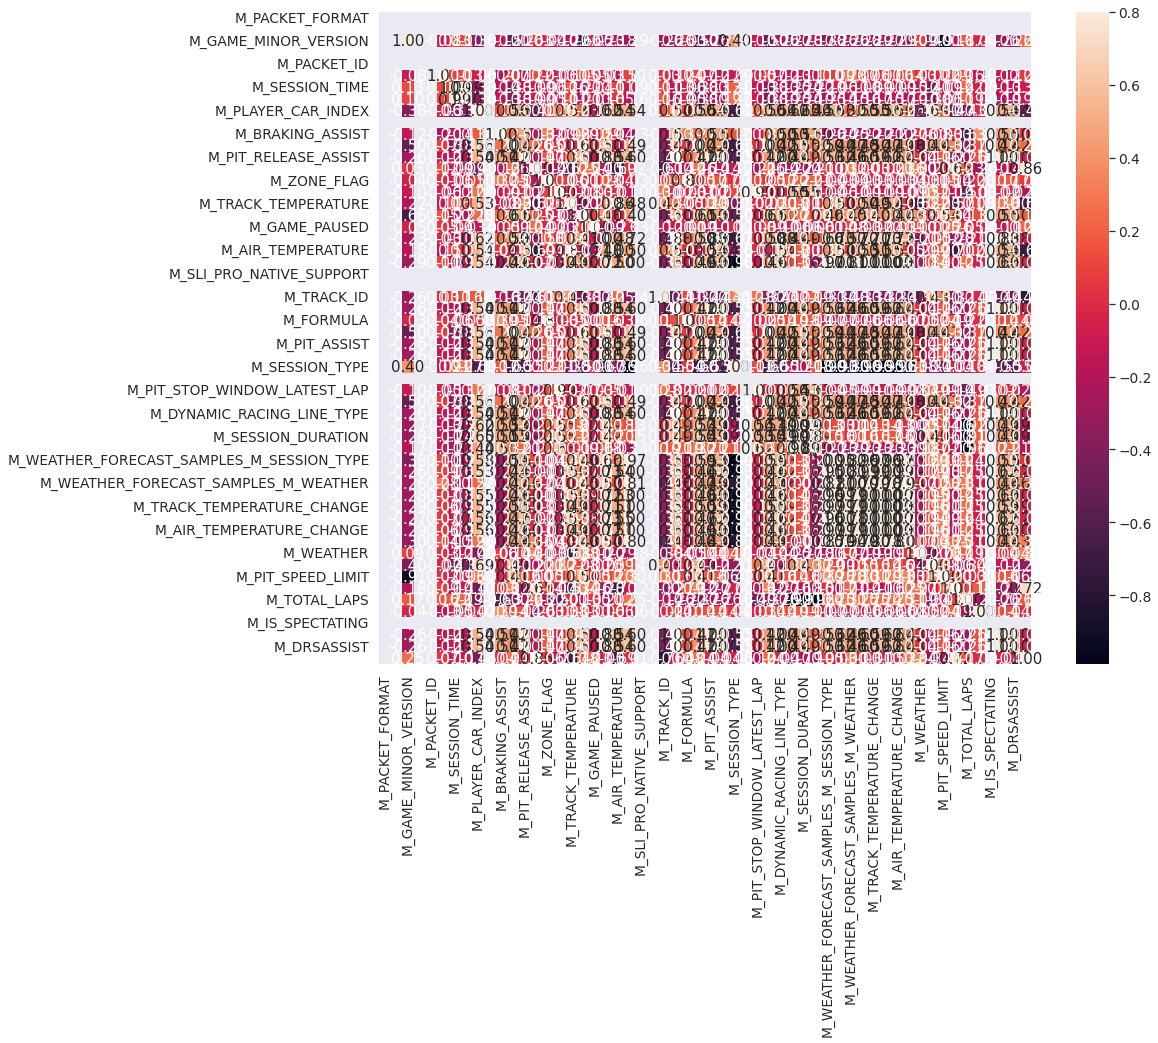

In [42]:
corrmat = de.corr()
f, ax = plt.subplots(figsize=(16, 12))
sns.heatmap(corrmat, vmax=.8, annot=True, square=True, fmt='.2f');


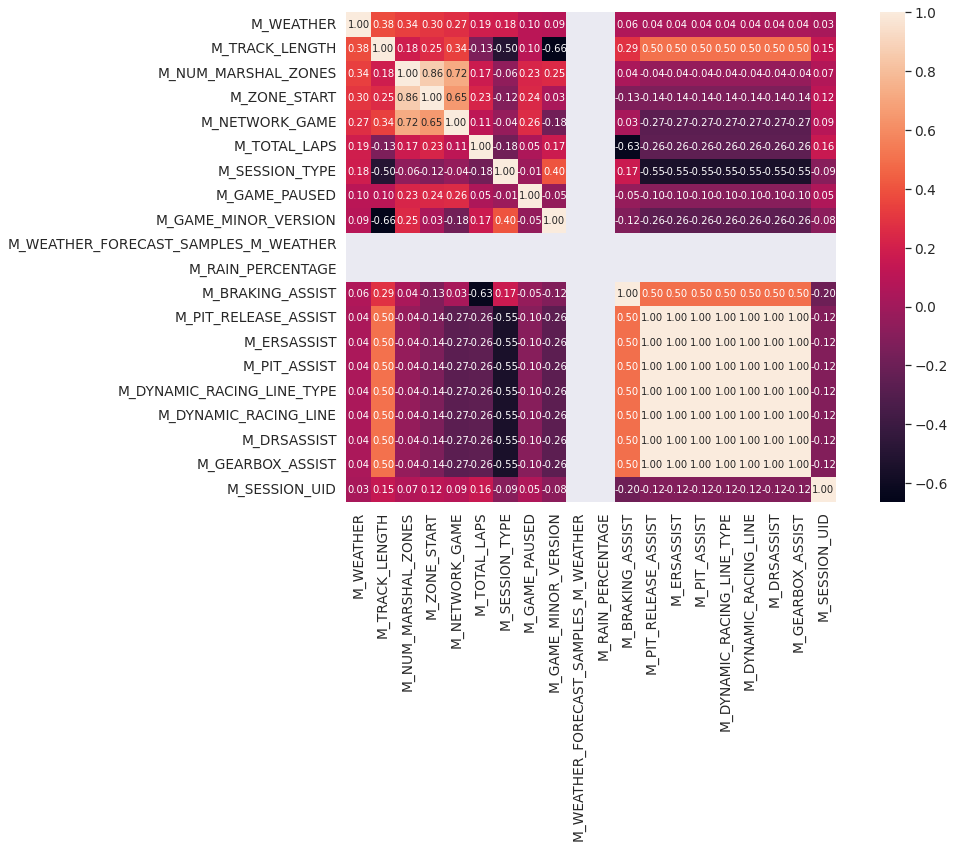

In [43]:
f, ax = plt.subplots(figsize=(16, 9))
k = 20 #number of variables for heatmap
cols = corrmat.nlargest(k, 'M_WEATHER')['M_WEATHER'].index
cm = np.corrcoef(de[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [44]:
df.isnull().sum()

M_PACKET_FORMAT                                        0
M_GAME_MAJOR_VERSION                                   0
M_GAME_MINOR_VERSION                                   0
M_PACKET_VERSION                                       0
M_PACKET_ID                                            0
M_SESSION_UID                                          0
M_SESSION_TIME                                         0
M_FRAME_IDENTIFIER                                     1
M_PLAYER_CAR_INDEX                                     1
M_SECONDARY_PLAYER_CAR_INDEX                           1
M_BRAKING_ASSIST                                       1
M_SESSION_LINK_IDENTIFIER                              1
M_PIT_RELEASE_ASSIST                                   1
TIMESTAMP                                              1
M_ZONE_START                                      402921
M_ZONE_FLAG                                       402921
M_PIT_STOP_WINDOW_IDEAL_LAP                            1
M_TRACK_TEMPERATURE            

In [45]:
de.isnull().sum()

M_PACKET_FORMAT                                   0
M_GAME_MAJOR_VERSION                              0
M_GAME_MINOR_VERSION                              0
M_PACKET_VERSION                                  0
M_PACKET_ID                                       0
M_SESSION_UID                                     0
M_SESSION_TIME                                    0
M_FRAME_IDENTIFIER                                0
M_PLAYER_CAR_INDEX                                0
M_SECONDARY_PLAYER_CAR_INDEX                      0
M_BRAKING_ASSIST                                  0
M_SESSION_LINK_IDENTIFIER                         0
M_PIT_RELEASE_ASSIST                              0
M_ZONE_START                                      0
M_ZONE_FLAG                                       0
M_PIT_STOP_WINDOW_IDEAL_LAP                       0
M_TRACK_TEMPERATURE                               0
M_TRACK_LENGTH                                    0
M_GAME_PAUSED                                     0
M_FORECAST_A

### Recommended work flow based on Hypothesis 2

1) deal with the missing values

2) group them to view the series

3) do some feature transformation

4) do some std correlation to select most predictive features

5) prepare for modelling

## A second peep at some of the interesting Features

In [34]:
# lets create columns of interest
col_1 = ['M_WEATHER_FORECAST_SAMPLES_M_SESSION_TYPE', 'M_TIME_OFFSET', 'M_WEATHER_FORECAST_SAMPLES_M_WEATHER', 
         'M_WEATHER_FORECAST_SAMPLES_M_TRACK_TEMPERATURE', 'M_TRACK_TEMPERATURE_CHANGE', 
         'M_WEATHER_FORECAST_SAMPLES_M_AIR_TEMPERATURE', 'M_AIR_TEMPERATURE_CHANGE', 'M_RAIN_PERCENTAGE']

col_2 = ['M_NETWORK_GAME', 'M_TOTAL_LAPS', 'M_STEERING_ASSIST', 'M_IS_SPECTATING', 'M_DYNAMIC_RACING_LINE', 'M_DRSASSIST', 'M_NUM_MARSHAL_ZONES']

col_3 = ['M_ZONE_START', 'M_ZONE_FLAG']

col_4 = ['M_WEEKEND_LINK_IDENTIFIER', 'M_SEASON_LINK_IDENTIFIER', 'M_SESSION_LINK_IDENTIFIER', 'M_SESSION_UID']
interest_col = [col_1, col_2, col_3, col_4]

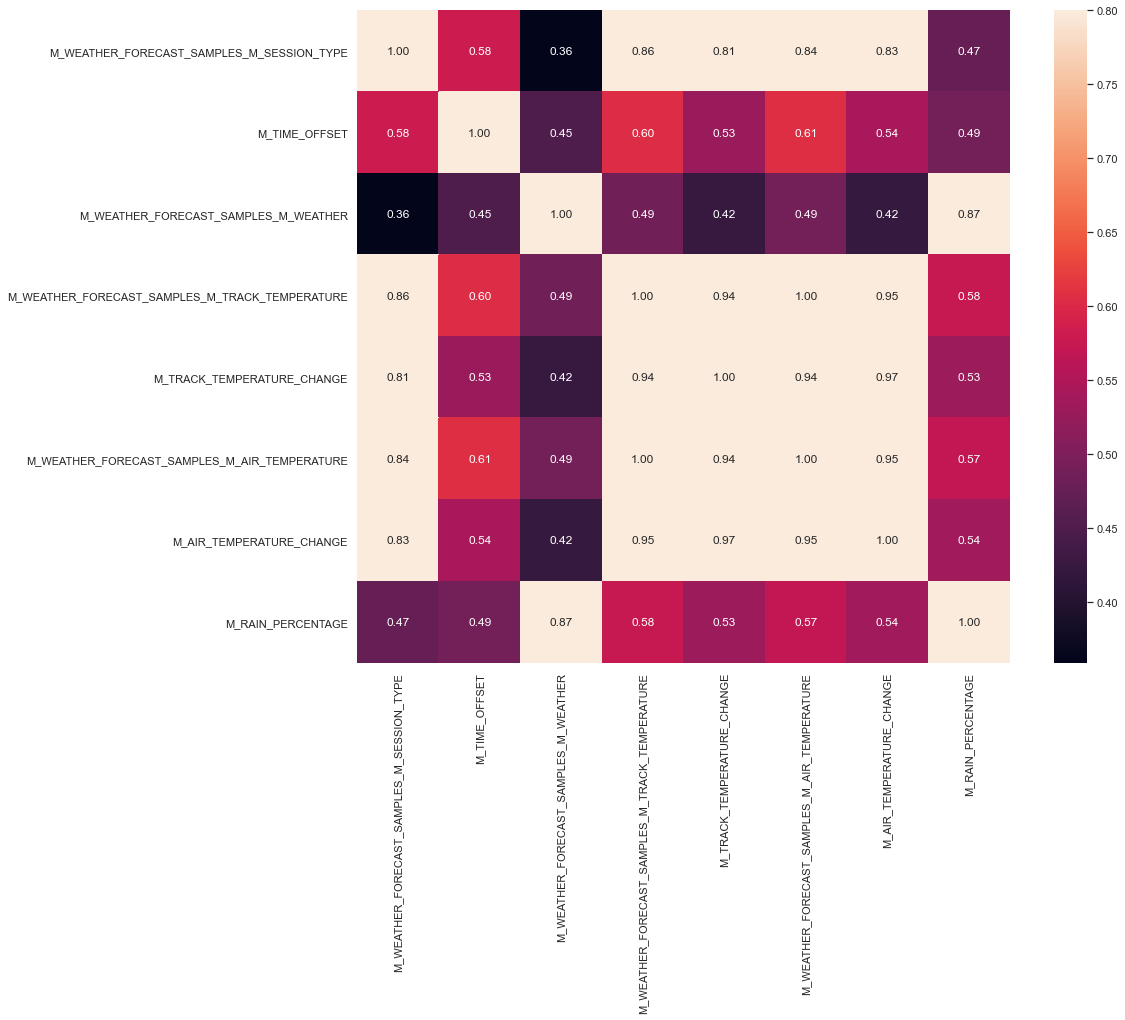

In [25]:
corrmat = df[col_1].corr()
f, ax = plt.subplots(figsize=(16, 12))
sns.heatmap(corrmat, vmax=.8, annot=True, square=True, fmt='.2f');


As expected, 

1) forcasted track temprature is so perfectly correlated with the forcasted air Temprature, 

2) forcasted track temprature changes is so well correlated with the air Temprature changes, and in turn related to the temps themself, i.e the changes are not so far from original, during the time stamp 

3) The session type is so related to the forcasted weather condition, hence, a good predictor to note.


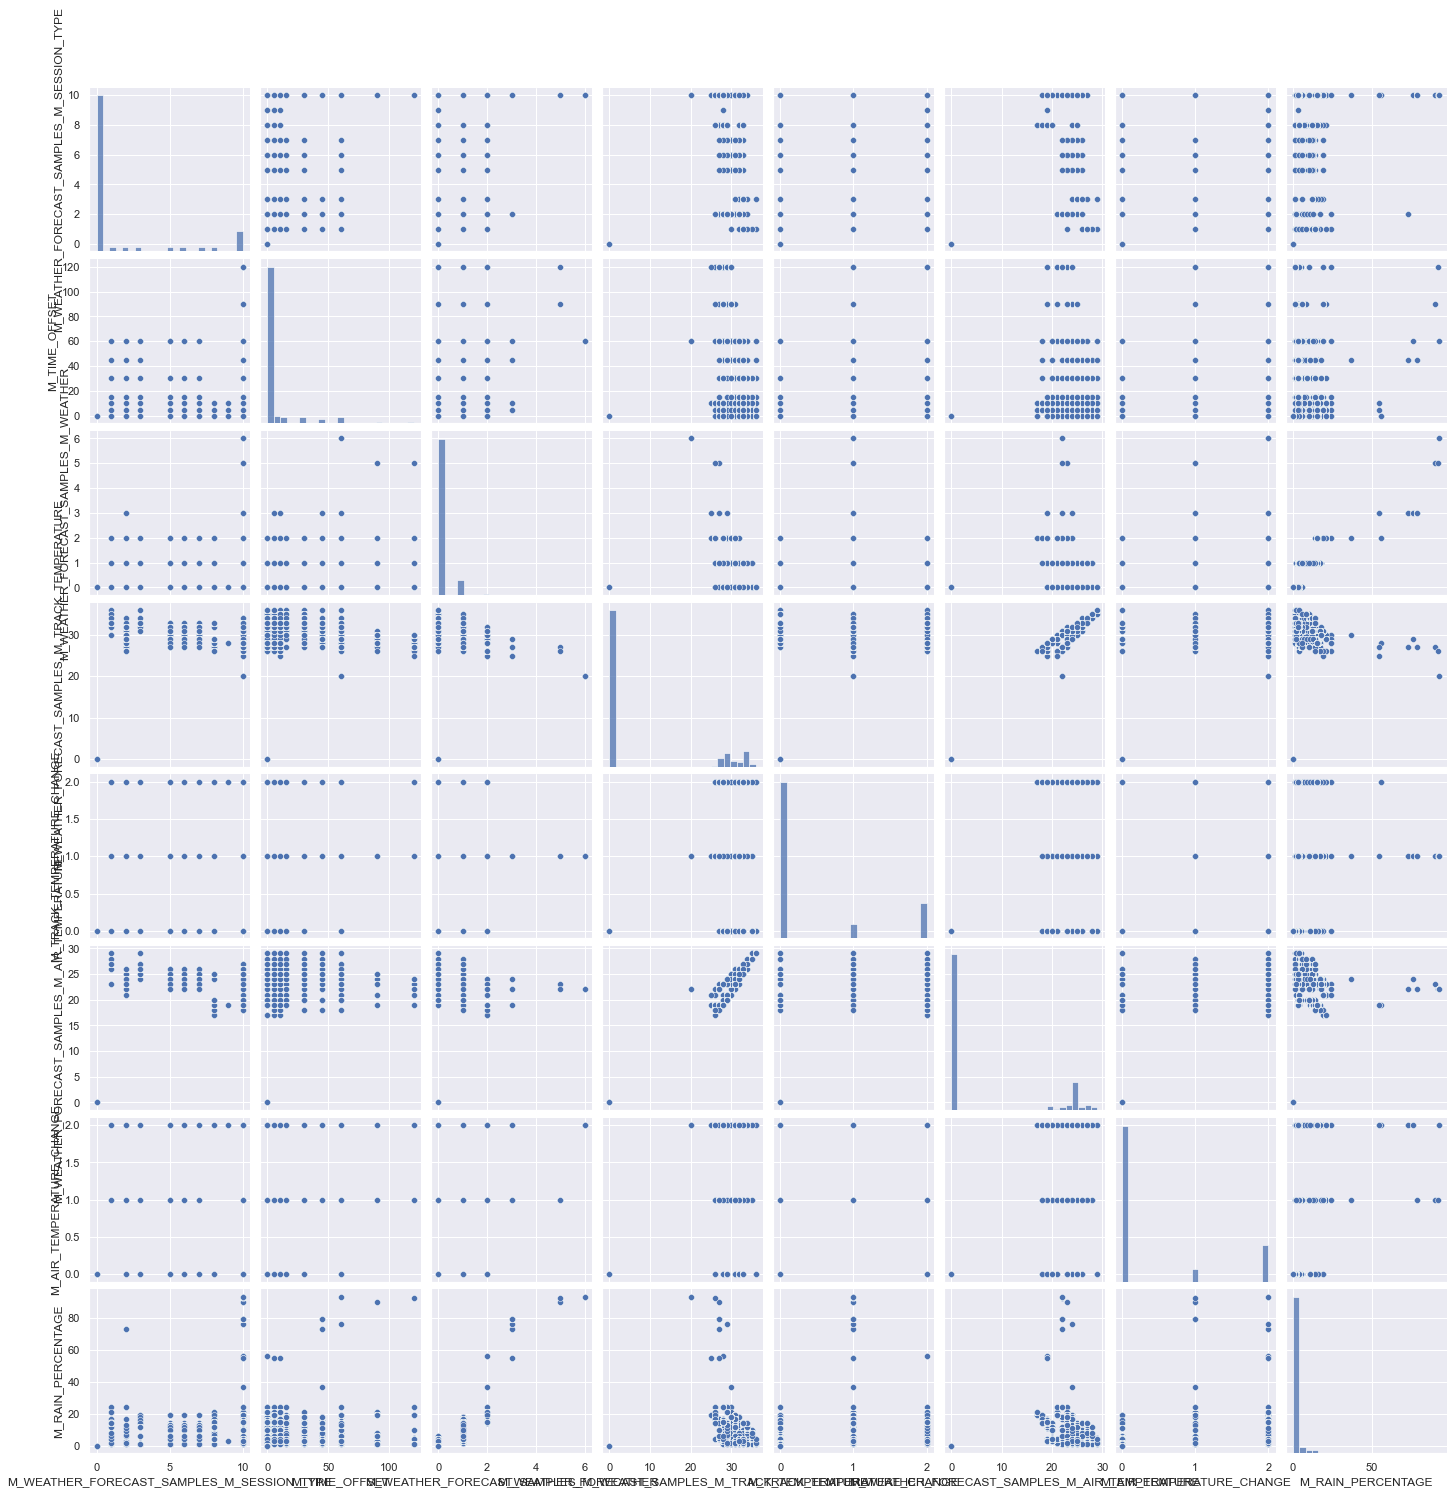

In [33]:
#scatterplot
sns.set()
sns.pairplot(df[col_1], size = 2.5)
plt.show();

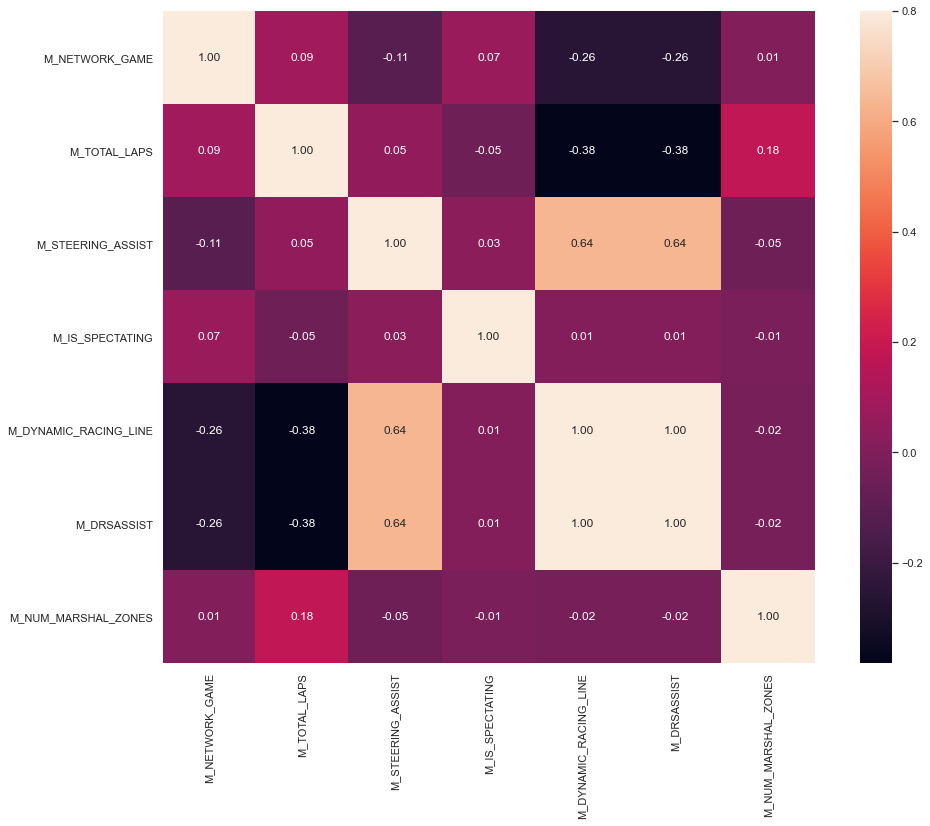

In [26]:
corrmat = df[col_2].corr()
f, ax = plt.subplots(figsize=(16, 12))
sns.heatmap(corrmat, vmax=.8, annot=True, square=True, fmt='.2f');

Whilst the correlation here is a little low, sweet spot of interest is in DRS_Assist and Dynamic Racing Line

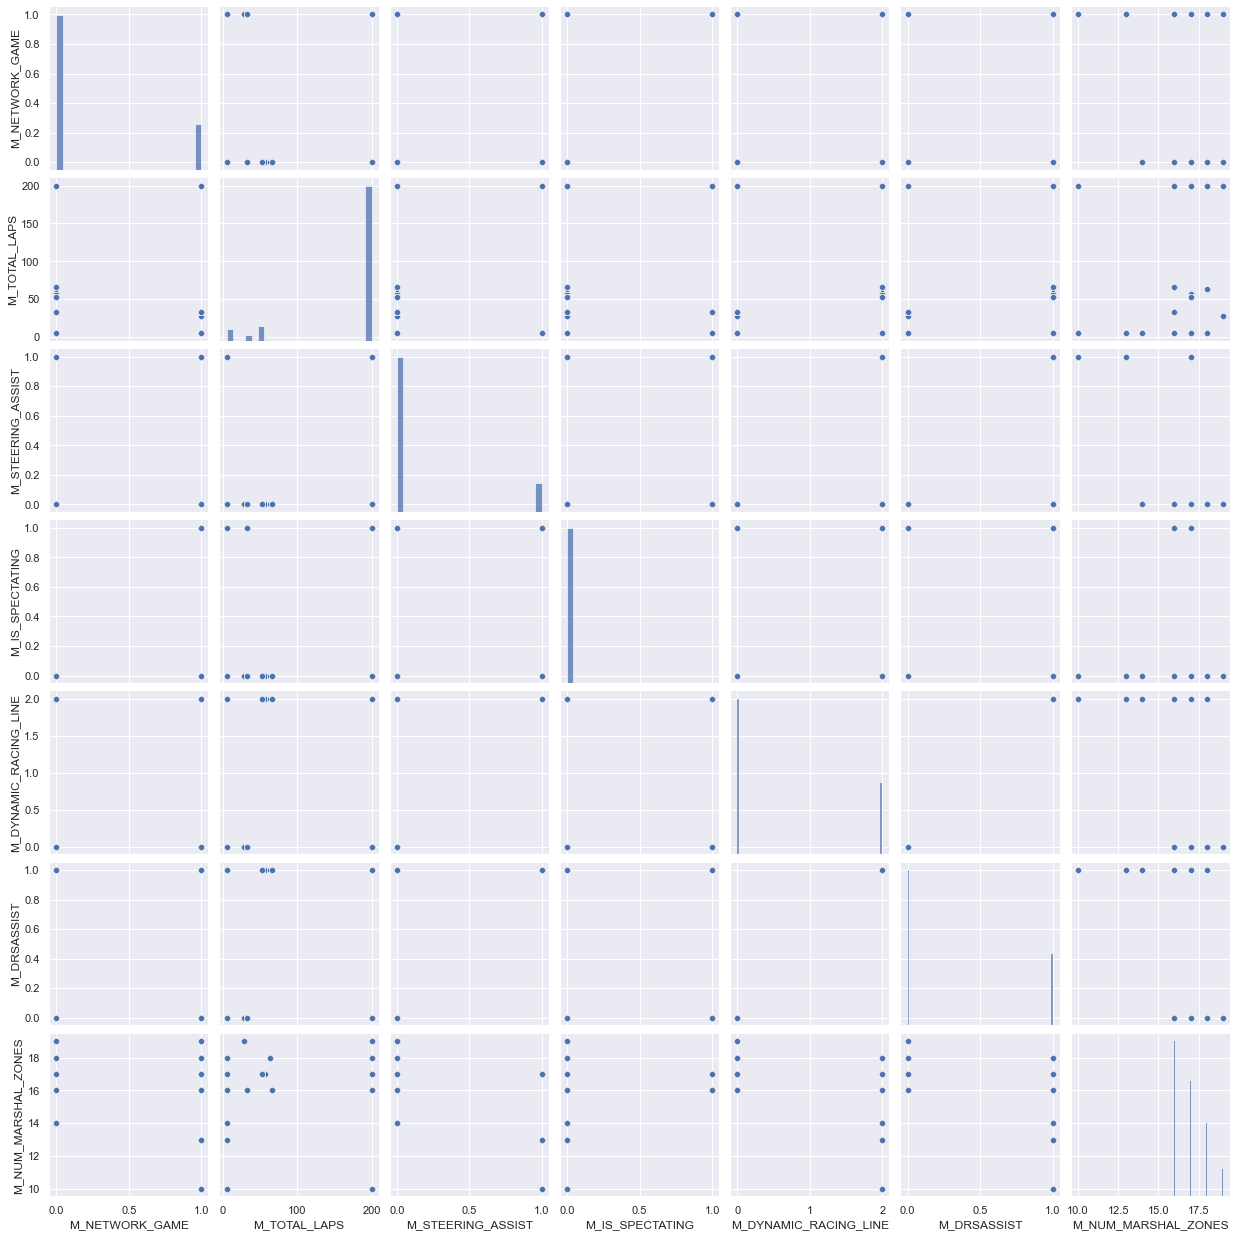

In [37]:
#scatterplot
sns.set()
sns.pairplot(df[col_2], size = 2.5)
plt.show();

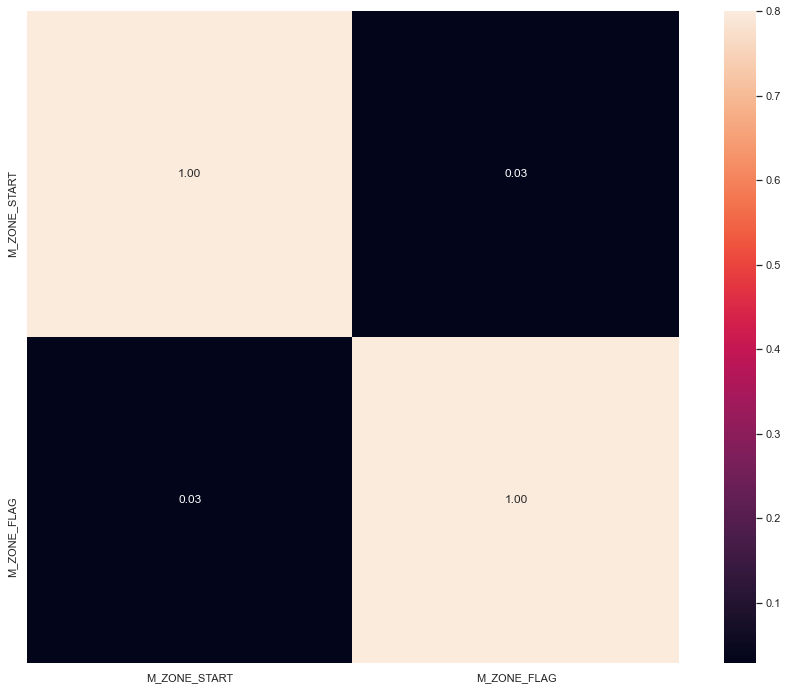

In [27]:
corrmat = df[col_3].corr()
f, ax = plt.subplots(figsize=(16, 12))
sns.heatmap(corrmat, vmax=.8, annot=True, square=True, fmt='.2f');

opps... Not so much

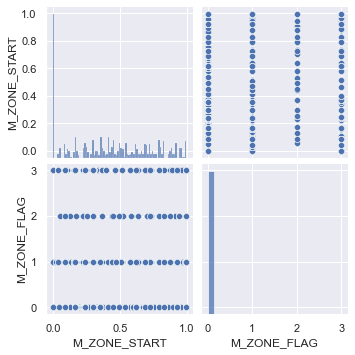

In [38]:
#scatterplot
sns.set()
sns.pairplot(df[col_3], size = 2.5)
plt.show();

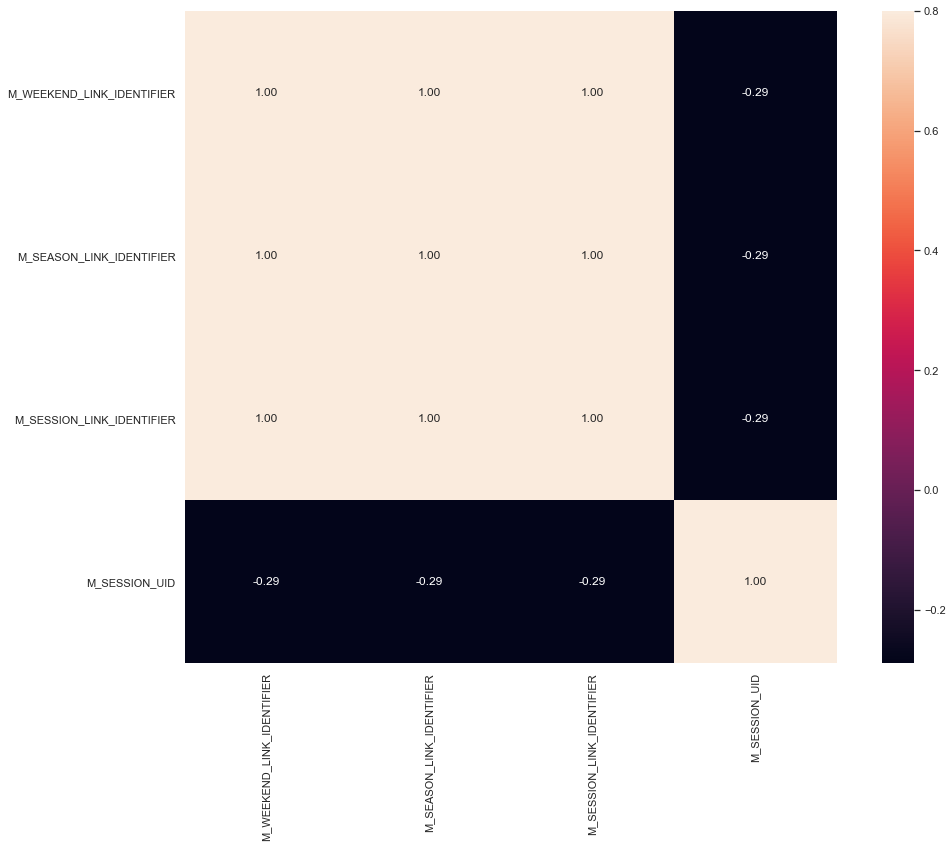

In [35]:
corrmat = df[col_4].corr()
f, ax = plt.subplots(figsize=(16, 12))
sns.heatmap(corrmat, vmax=.8, annot=True, square=True, fmt='.2f');

Again, as anticipated, so we will just use 1 of the 3 features as representative of others

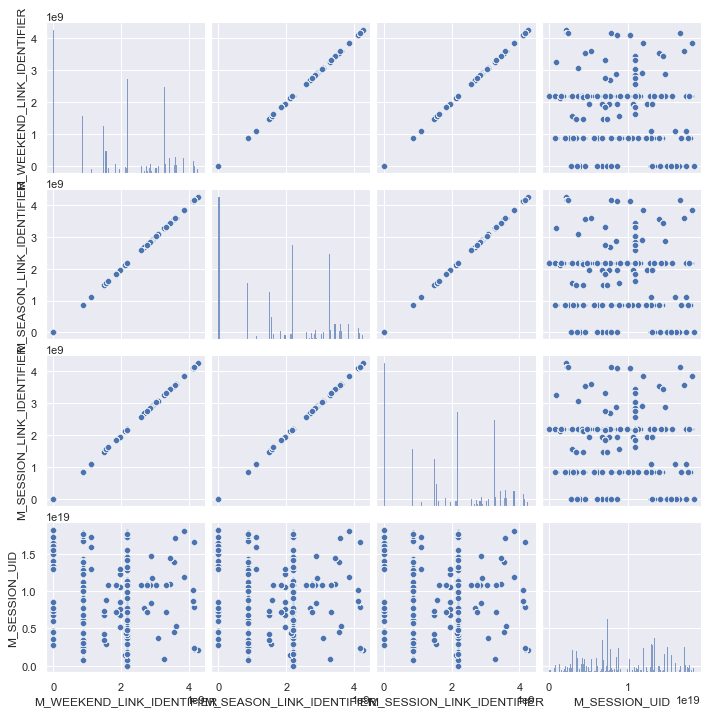

In [75]:
#scatterplot
sns.set()
sns.pairplot(df[col_4], size = 2.5)
plt.show();

## Now Lets take a wholistic view of the data

In [ ]:
#correlation matrix
corrmat = df.corr()
f, ax = plt.subplots(figsize=(16, 12))
sns.heatmap(corrmat, vmax=.8, square=True);

In [ ]:
# top 25 most correlated features with Weather (correlation matrix) 

f, ax = plt.subplots(figsize=(16, 9))
k = 25 #number of variables for heatmap
cols = corrmat.nlargest(k, 'M_WEATHER')['M_WEATHER'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [ ]:
# top 25 most correlated features with % rainfall (correlation matrix)

f, ax = plt.subplots(figsize=(16, 9))
k = 25 #number of variables for heatmap
cols = corrmat.nlargest(k, 'M_RAIN_PERCENTAGE')['M_RAIN_PERCENTAGE'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

## Now let us take a deeper dive into the target Variables

In [67]:
df['M_WEATHER'].describe()

count    3.572328e+06
mean     3.304962e-01
std      7.195647e-01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      1.000000e+00
max      5.000000e+00
Name: M_WEATHER, dtype: float64

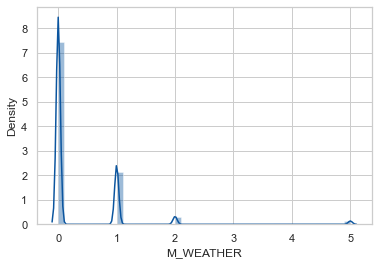

In [65]:
# Lets see the weather plot
sns.distplot(df['M_WEATHER']);

In [69]:
# Seems there is no value for 3 and 4
df['M_WEATHER'].value_counts()

0    2664421
1     763609
2     101486
5      42812
Name: M_WEATHER, dtype: int64

As expected, there are no record for light and heavy rainfall

In [70]:
df['M_RAIN_PERCENTAGE'].describe()

count    2.598054e+06
mean     1.147212e+00
std      3.353760e+00
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      9.300000e+01
Name: M_RAIN_PERCENTAGE, dtype: float64

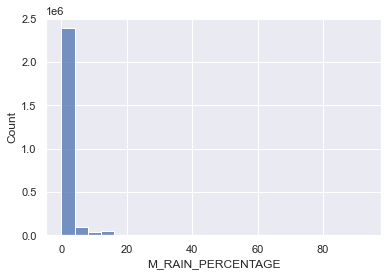

In [76]:
# Lets see the weather plot
sns.histplot(df['M_RAIN_PERCENTAGE']);

In [71]:
With this kind of visuals, we might need some normalization, lets take a closer look
df['M_RAIN_PERCENTAGE'].value_counts()

0.0     1953651
1.0      196196
3.0       94250
2.0       77153
4.0       70709
6.0       50614
14.0      32823
5.0       23234
7.0       16791
11.0      13667
13.0      12217
10.0      12133
8.0       10168
9.0        9837
12.0       7795
18.0       4522
15.0       3531
21.0       2151
19.0       2017
16.0       1916
17.0        862
93.0        486
79.0        486
20.0        399
24.0        195
55.0        156
56.0         78
73.0          9
90.0          2
37.0          2
76.0          2
92.0          2
Name: M_RAIN_PERCENTAGE, dtype: int64

In [74]:
df[df['M_RAIN_PERCENTAGE']<10].M_RAIN_PERCENTAGE.count()/df.M_RAIN_PERCENTAGE.count()*100

96.32605788794228

In [ ]:
So more than 96% of the target entries falls in the first 10 percentals

## Now Lets look into Features with missing values and how to fill them up

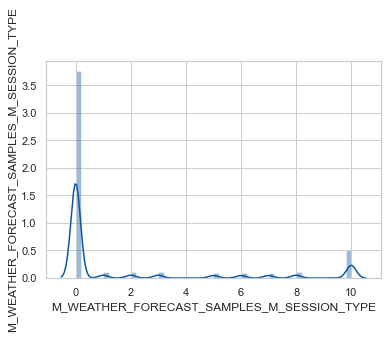

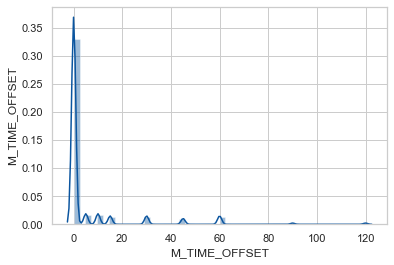

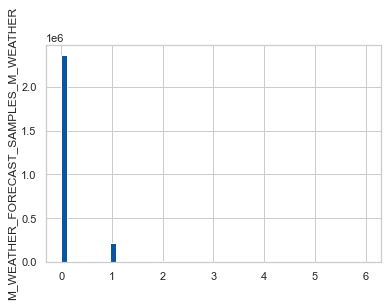

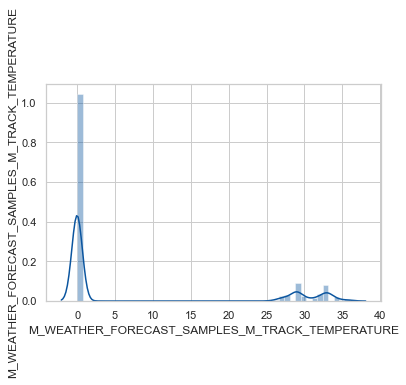

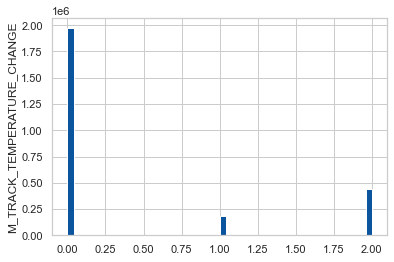

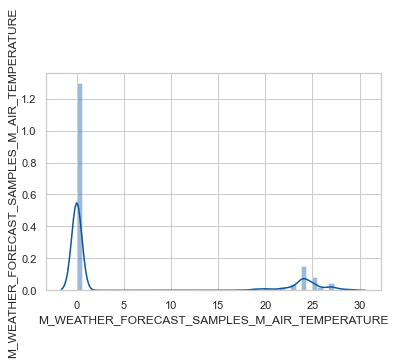

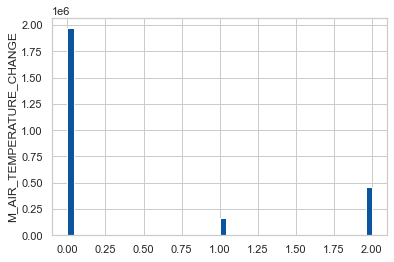

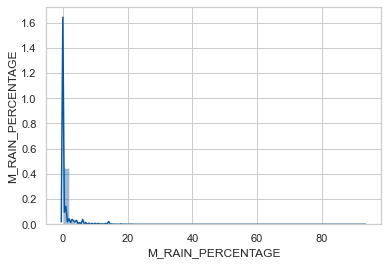

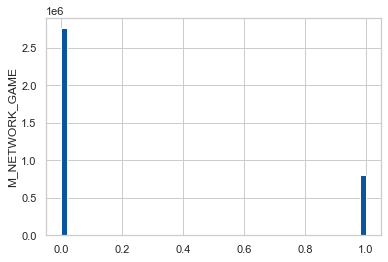

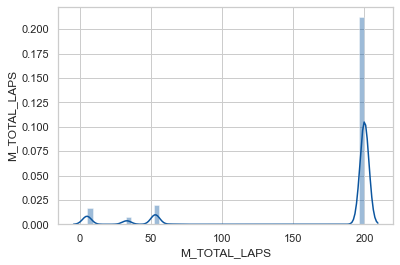

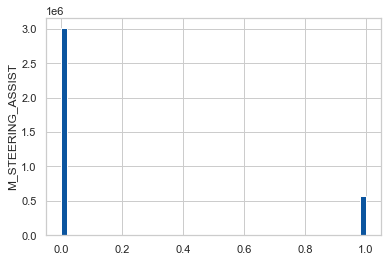

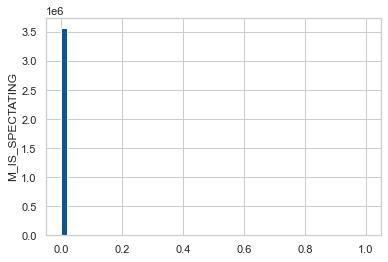

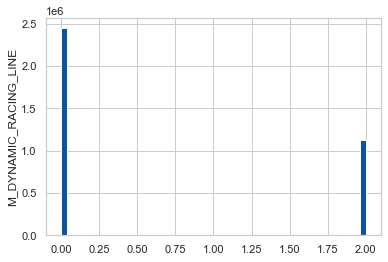

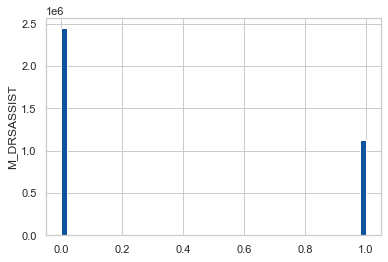

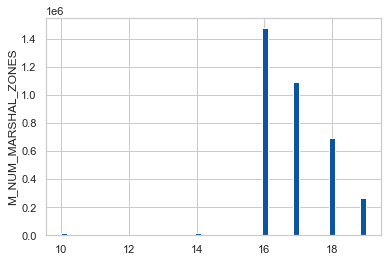

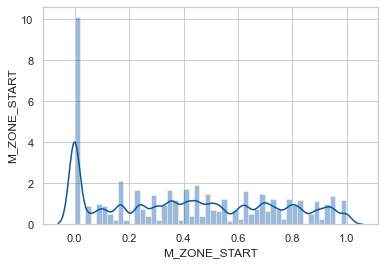

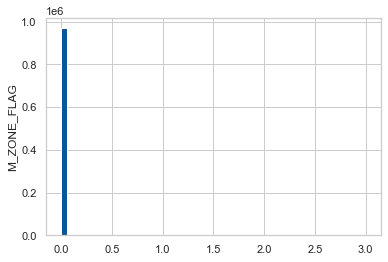

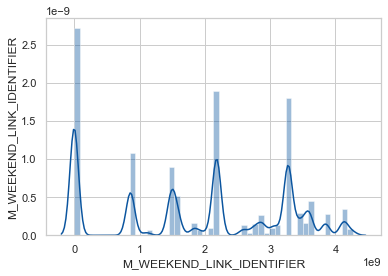

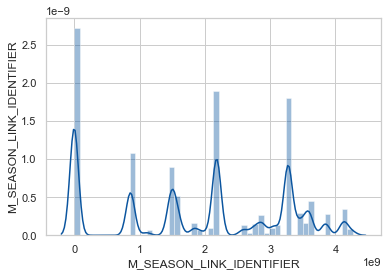

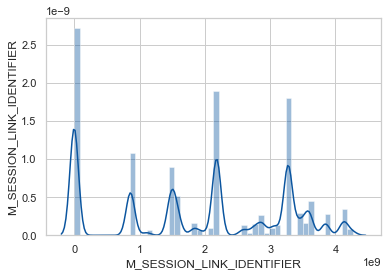

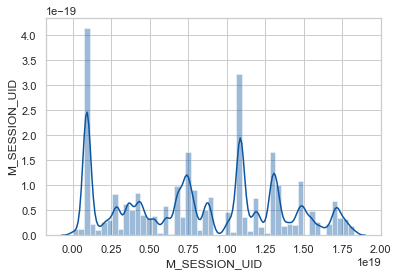

In [63]:
for array in interest_col:
    for feature in array:
        if df[feature].nunique()> 7:
            sns.distplot(df[feature], bins=50, hist_kws={'alpha': 0.4})
        else:
            plt.hist(df[feature], bins=50, label=feature)
        plt.ylabel(feature)
        plt.show()

In [ ]:
Seems we might need to Normalise before filling the missing values

## Now Lets look at the visuals for the data set and its relationship with the target

In [81]:
df_corr = df.corr()['M_WEATHER'][:] # -1 because the latest row is SalePrice
golden_features_list = df_corr[abs(df_corr) > 0.5].sort_values(ascending=False)
print("There is {} strongly correlated values with Weather:\n{}".format(len(golden_features_list), golden_features_list))


There is 2 strongly correlated values with Weather:
M_WEATHER              1.000000
M_TRACK_TEMPERATURE   -0.614053
Name: M_WEATHER, dtype: float64


In [ ]:
df_corr = df.corr()['M_RAIN_PERCENTAGE'][:-1] # -1 because the latest row is SalePrice
golden_features_list = df_corr[abs(df_corr) > 0.5].sort_values(ascending=False)
print("There is {} strongly correlated values with Weather:\n{}".format(len(golden_features_list), golden_features_list))


## Now lets look out for outliers